In [2]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [3]:
def logReg(i,y_test,x_test):
    clf= LogisticRegression()
    clf.fit(X_train,y_train)

    scores_a = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    a = mean(absolute(scores_a))

    scores_p = cross_val_score(clf, X, y, scoring='precision', cv=cv, n_jobs=-1)
    p = mean(absolute(scores_p))

    scores_r = cross_val_score(clf, X, y, scoring='recall', cv=cv, n_jobs=-1)
    r = mean(absolute(scores_r))

    scores_f1 = cross_val_score(clf, X, y, scoring='f1', cv=cv, n_jobs=-1)
    f1 = mean(absolute(scores_f1))

    feature_cols = list(X.columns) 
    target_cols = ['0','1']

    y_pred = clf.predict_proba(x_test)[:, 1]
    auc = metrics.roc_auc_score(y_test, y_pred)

    probs = clf.predict_proba(x_test)


    
    return a,p,r,f1,auc,probs,clf

In [4]:
accuracylogReg= pd.DataFrame(columns=['Sentence', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
featureImportance= pd.DataFrame(columns=['Sentence', 'Feature', 'Score'])

n = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60]#
feature_cols = ['Erstloesung','Schussel','Erfolg', 'Schwierigkeit', 'ist_Schulzeit', 'MehrfachFalsch', 'vorher_abgebrochen','Fehler', 'Klassenstufe', 'Jahredabei', 'AnzahlAufgaben', 'Sex__m', 'Sex__w', 'Testposition__pruefung', 'Testposition__training','Testposition__version', 'Art__GK', 'Art__GR', 'Art__GZ', 'Art__K', 'Art__LB','UserAttribut', 'OrderNumber', 'steps']
#
for i in n:
    path='matrices_allsessions/matrix'+str(i)+'.pkl'
    infile = open(path,'rb')
    df = pickle.load(infile)
    infile.close()
    df=df.reset_index()

    X = df[feature_cols]
    y = df.y
    y= y.astype('int')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # infile = open('X_test55.pkl','rb')
    # X_test = pickle.load(infile)
    # infile.close()

    # infile = open('y_test55.pkl','rb')
    # y_test = pickle.load(infile)
    # infile.close()

    k = 5
    cv = KFold(n_splits=k, random_state=None)

    a,p,r,f1,auc,probs,clf = logReg(i,y_test, X_test)
    accuracylogReg = accuracylogReg.append({'Sentence': i, 'Accuracy':a,'Precision': p, 'Recall':r, 'F1':f1, 'AUC':auc}, ignore_index=True)

    # get importance
    importance = clf.coef_[0]
    # summarize feature importance
    for p,v in enumerate(importance):
        #print('Feature: %0d, Score: %.5f' % (p,v))
        featureImportance = featureImportance.append({'Sentence': i, 'Feature':p,'Score': v}, ignore_index=True)



#accuracylogReg.to_pickle('accuracylogReg.pkl')
featureImportance.to_pickle('featureImportanceLogReg.pkl')

C:\Users\Nathalie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nathalie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

            Score
             mean
Feature          
0.0      0.023667
1.0     -0.079980
2.0      0.192018
3.0      0.297321
4.0     -0.041697
5.0     -0.003250
6.0      0.175960
7.0     -0.018026
8.0      0.143768
9.0     -0.133703
10.0    -0.001757
11.0     0.035418
12.0    -0.069498
13.0    -0.170164
14.0     0.101407
15.0    -0.260185
16.0     0.153024
17.0    -0.208345
18.0    -0.048482
19.0     0.099108
20.0    -0.013961
21.0     0.164263
22.0    -0.026311
23.0     0.065994


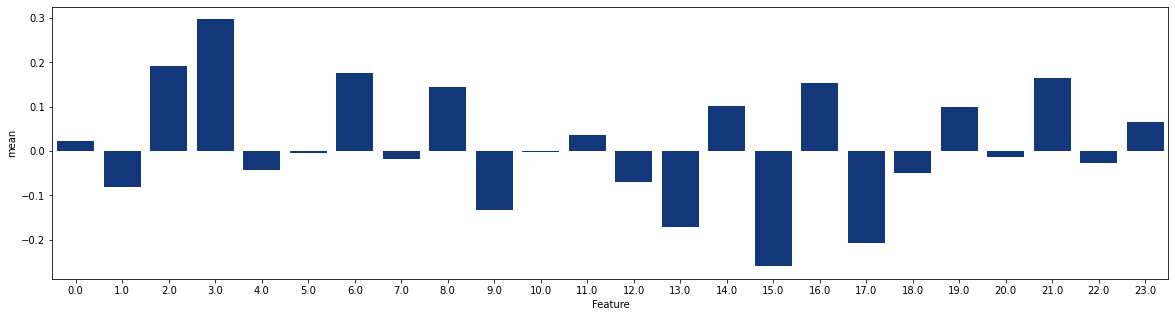

In [7]:
featureImportance_grouped = featureImportance.groupby('Feature').agg({'Score':['mean']})
print(featureImportance_grouped)
featureImportance_grouped.to_pickle('featureImportance_groupedlogreg.pkl')

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=featureImportance_grouped.index, y=featureImportance_grouped.Score['mean'], data=featureImportance_grouped, color='#00338d')

In [29]:
t = probs[:,:1].tolist()
data_df = pd.DataFrame(t)
print(data_df)
data_df.to_pickle('logreg55.pkl')

             0
0     0.035837
1     0.058788
2     0.056531
3     0.024039
4     0.033929
...        ...
2778  0.049575
2779  0.249910
2780  0.051217
2781  0.067549
2782  0.056743

[2783 rows x 1 columns]


In [30]:
# sns.set_theme()

# sns.lineplot(data=accuracylogReg, x="Sentence", y="Accuracy")
# plt.show()

# sns.lineplot(data=accuracylogReg, x="Sentence", y="Precision")
# plt.show()

# sns.lineplot(data=accuracylogReg, x="Sentence", y="Recall")
# plt.show()

# sns.lineplot(data=accuracylogReg, x="Sentence", y="F1")
# plt.show()

# sns.lineplot(data=accuracylogReg, x="Sentence", y="AUC")
# plt.show()